In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode


A1=[1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1, 0, 0,1,0,1,1,0,1,1,0] # healthy patients
A2=[.70,.80,.65,.50,.30,.40,.60,.20,.70,.75,.40,.30,.50,.75,.45,.60,.30,.40,.50,.60,.90,.20,.15,.20,.70,.50,.60,.25,.85,.95,.15] #propability of patient health
A3=[23,23,24,40,50,60,79,30,85,45,9,40,78,32,41,86,93,28,36,47,20,38,38,40,60, 39, 28, 49,50, 69, 78] # age of patient
  
# training set for healthy patients    
X = np.zeros(shape=(len(A1),3))

#testing set for healthy patients
X_test = np.zeros(shape=(5,3))
X_test[0,:] = [.30, 70, 0]
X_test[1, :] = [.70, 32, 0]
X_test[2, :] = [.65, 45, 1]
X_test[3, :] = [.80, 25, 1]
X_test[4, :] = [.0, 100, 0]



X[:,0] = A2
X[:,1] = A3
X[:,2] = A1
    
#Part A.1
def euclidean_distance(x,y):
    distance = 0
    for i in range(0, len(x)):
        distance = distance + pow(abs(x[i] - y[i]), 2)
        
    distance = math.sqrt(distance)
    
    
    return distance
    
print("Euclidean Distance: ",euclidean_distance(A1,A2))


Euclidean Distance:  2.147673159491453


In [29]:
#Part A.2
def manhattan_distance(x, y):
    distance = 0
    for i in range(0, len(x)):
        distance = distance + abs(x[i] - y[i])
    return distance

print("Manhattan Distance: ",manhattan_distance(A1,A2))

Manhattan Distance:  10.750000000000002


In [19]:
#Part A.3
def accuracy_generalization_error(x,y):
    count = 0
    error = 0
    for i in range(0, len(x)):
        if(x[i]==1 and .5 < y[i]):
            count = count + 1
    
    return count/len(x), 1-(count/len(x))

print("Accuracy and error: ",accuracy_generalization_error(A1, A2))

Accuracy and error:  (0.41935483870967744, 0.5806451612903225)


In [82]:
#Part A.4
def precision(x,y):
    truePositive = 0
    falsePositive = 0
    for i in range(0, len(x)):
        if(x[i] == 1 and .5 < y[i]):
            truePositive = truePositive + 1
        elif(x[i] == 0 and .5 <y[i]):
            falsePositive = falsePositive + 1       
    return truePositive/(truePositive+falsePositive)

print("Precision is ", precision(A1, A2))

def recall(x,y):
    truePositive = 0
    falseNegative = 0
    for i in range(0, len(x)):
        if(x[i] == 1 and .5 < y[i]):
            truePositive = truePositive + 1
        elif(x[i] == 0 and y[i] <= .5):
            falseNegative = falseNegative + 1         
    return truePositive/(truePositive+falseNegative)

print("Recall: ", recall(A1, A2))

print("F1 Score is ", (2*precision(A1,A2)*recall(A1,A2))/(precision(A1,A2)+recall(A1,A2)))

Precision is  0.9285714285714286
Recall:  0.5
F1 Score is  0.65


In [44]:
# Part A.5
def confusion_matrix(x,y):
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    for i in range(0, len(x)):
        if(x[i]==0 and y[i] <= .5):
            TN = TN + 1
        elif(x[i]==0 and .5 < y[i]):
            FP = FP + 1
        elif(x[i]==1 and y[i] <= .5):
            FN = FN + 1
        elif(x[i]==1 and .5 < y[i]):
            TP = TP + 1
    print("n=%d\t Predicted: NO \t Predicted YES:" % len(x))
    print("\nActual:  ")
    print(" NO \t    %d \t\t   %d" % (TN, FP))
    print("\nActual:")
    print(" YES \t    %d \t\t   %d" % (FN, TP))
    
confusion_matrix(A1, A2)

n=31	 Predicted: NO 	 Predicted YES:

Actual:  
 NO 	    13 		   1

Actual:
 YES 	    4 		   13


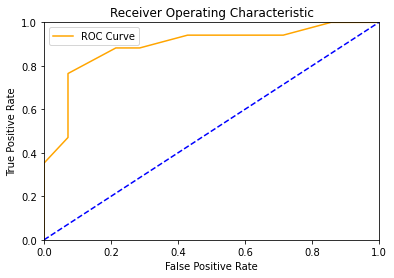

In [9]:
# Part A.6
def ROC_curve(x,y):
    test=[0,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1]
    TPR=[]
    FPR = []
    for i in range(0,len(test)):
        TN = 0
        FP = 0
        FN = 0
        TP = 0
        for j in range(0, len(x)):
            if(x[j]==0 and y[j] <= test[i]):
                TN = TN + 1
            elif(x[j]==0 and test[i] < y[j]):
                FP = FP + 1
            elif(x[j]==1 and y[j]<=test[i]):
                FN = FN + 1
            elif(x[j]==1 and test[i] < y[j]):
                TP = TP + 1

        TPR.append(TP/(TP + FN))
        FPR.append(FP/(FP + TN))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(FPR,TPR, label="ROC Curve", color='orange')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

    
ROC_curve(A1, A2)

In [206]:
# Part A.7
def AUC(x,y):
    test=[0,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1]
    TPR = []
    FPR = []
    auc = 0
    for i in range(0,len(test)):
        TN = 0
        FP = 0
        FN = 0
        TP = 0
        for j in range(0, len(x)):
            if(x[j]==0 and y[j] <= test[i]):
                TN = TN + 1
            elif(x[j]==0 and test[i] < y[j]):
                FP = FP + 1
            elif(x[j]==1 and y[j]<=test[i]):
                FN = FN + 1
            elif(x[j]==1 and test[i] < y[j]):
                TP = TP + 1

        TPR.append(TP/(TP + FN))
        FPR.append(FP/(FP + TN))
        
    TPR.reverse()
    FPR.reverse()
        
    for i in range(1, len(TPR)):
        auc =  auc + TPR[i]*(FPR[i]-FPR[i-1])
    
    return auc
        
print("AUC: ",AUC(A1,A2))
        
    

AUC:  0.9117647058823529


In [114]:
# Part A.9

# self - objects that hold variables
# X - numpy matrix with rows representing data samples and columns representing features
# Y - 1D numpy array with labels corresponding to each row of the feature matrix X
# n_neighbors - # of the nearest neighbors 
# weights - string(default = 'uniform'), weight function used in prediction

kwargs = { 'uniform' : 'uniform', 'euclidean' : 'euclidean_distance(X,Y)', 'manhattan' : 'manhattan_distance(X,Y)'}

       
class KNN_Classifier:
    def __init__(self):
        self.X = np.array([])
        self.Y = np.array([])
        self.n_neighors = 0
        self.weights = 'uniform'
        
    def fit(self, X, Y, n_neighbors, weights):
        self.X = X
        self.Y = Y 
        self.n_neighbors = n_neighbors
        self.weights = weights
    
    def predict(self, X):
        predictions = np.zeros(shape=(len(X),1))
        for i in range(0,len(X)):
            distances = np.zeros(shape=(len(self.Y),2))
            for j in range(0, len(self.Y)):
                tmp_distance = 0
                if(self.weights == 'euclidean'):
                    tmp_distance = euclidean_distance(X[i,:], self.X[j,:])
                elif(self.weights == 'manhatten'):
                    tmp_distance = manhattan_distance(X[i,:], self.X[j,:])
                distances[j][0] = tmp_distance
                distances[j][1] = self.Y[j]
            
            distances = distances[distances[:,0].argsort()]
            distances = distances[0:self.n_neighbors][:]
            predictions[i] = mode(distances[:,1])
            

            
            #store predictions
        return predictions
            
            
            
            
    
    
patient_data = pd.read_csv('patients.csv')
patient_data = patient_data.to_numpy()
    
model = KNN_Classifier()
model.fit(X, X[:,2], 3, 'euclidean')
model.predict(X_test)


array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [123]:
# part 2 
data = pd.read_csv('winequality-white.csv',sep=";")
data.info()

data.loc[data['quality'] <= 5, 'quality'] = 0 #bad
data.loc[data['quality'] > 5, 'quality'] = 1  #Good

#summarize each of the variables in the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [117]:
#13) fhuffle the rows of data
shuffle_row=data.sample(frac=1)

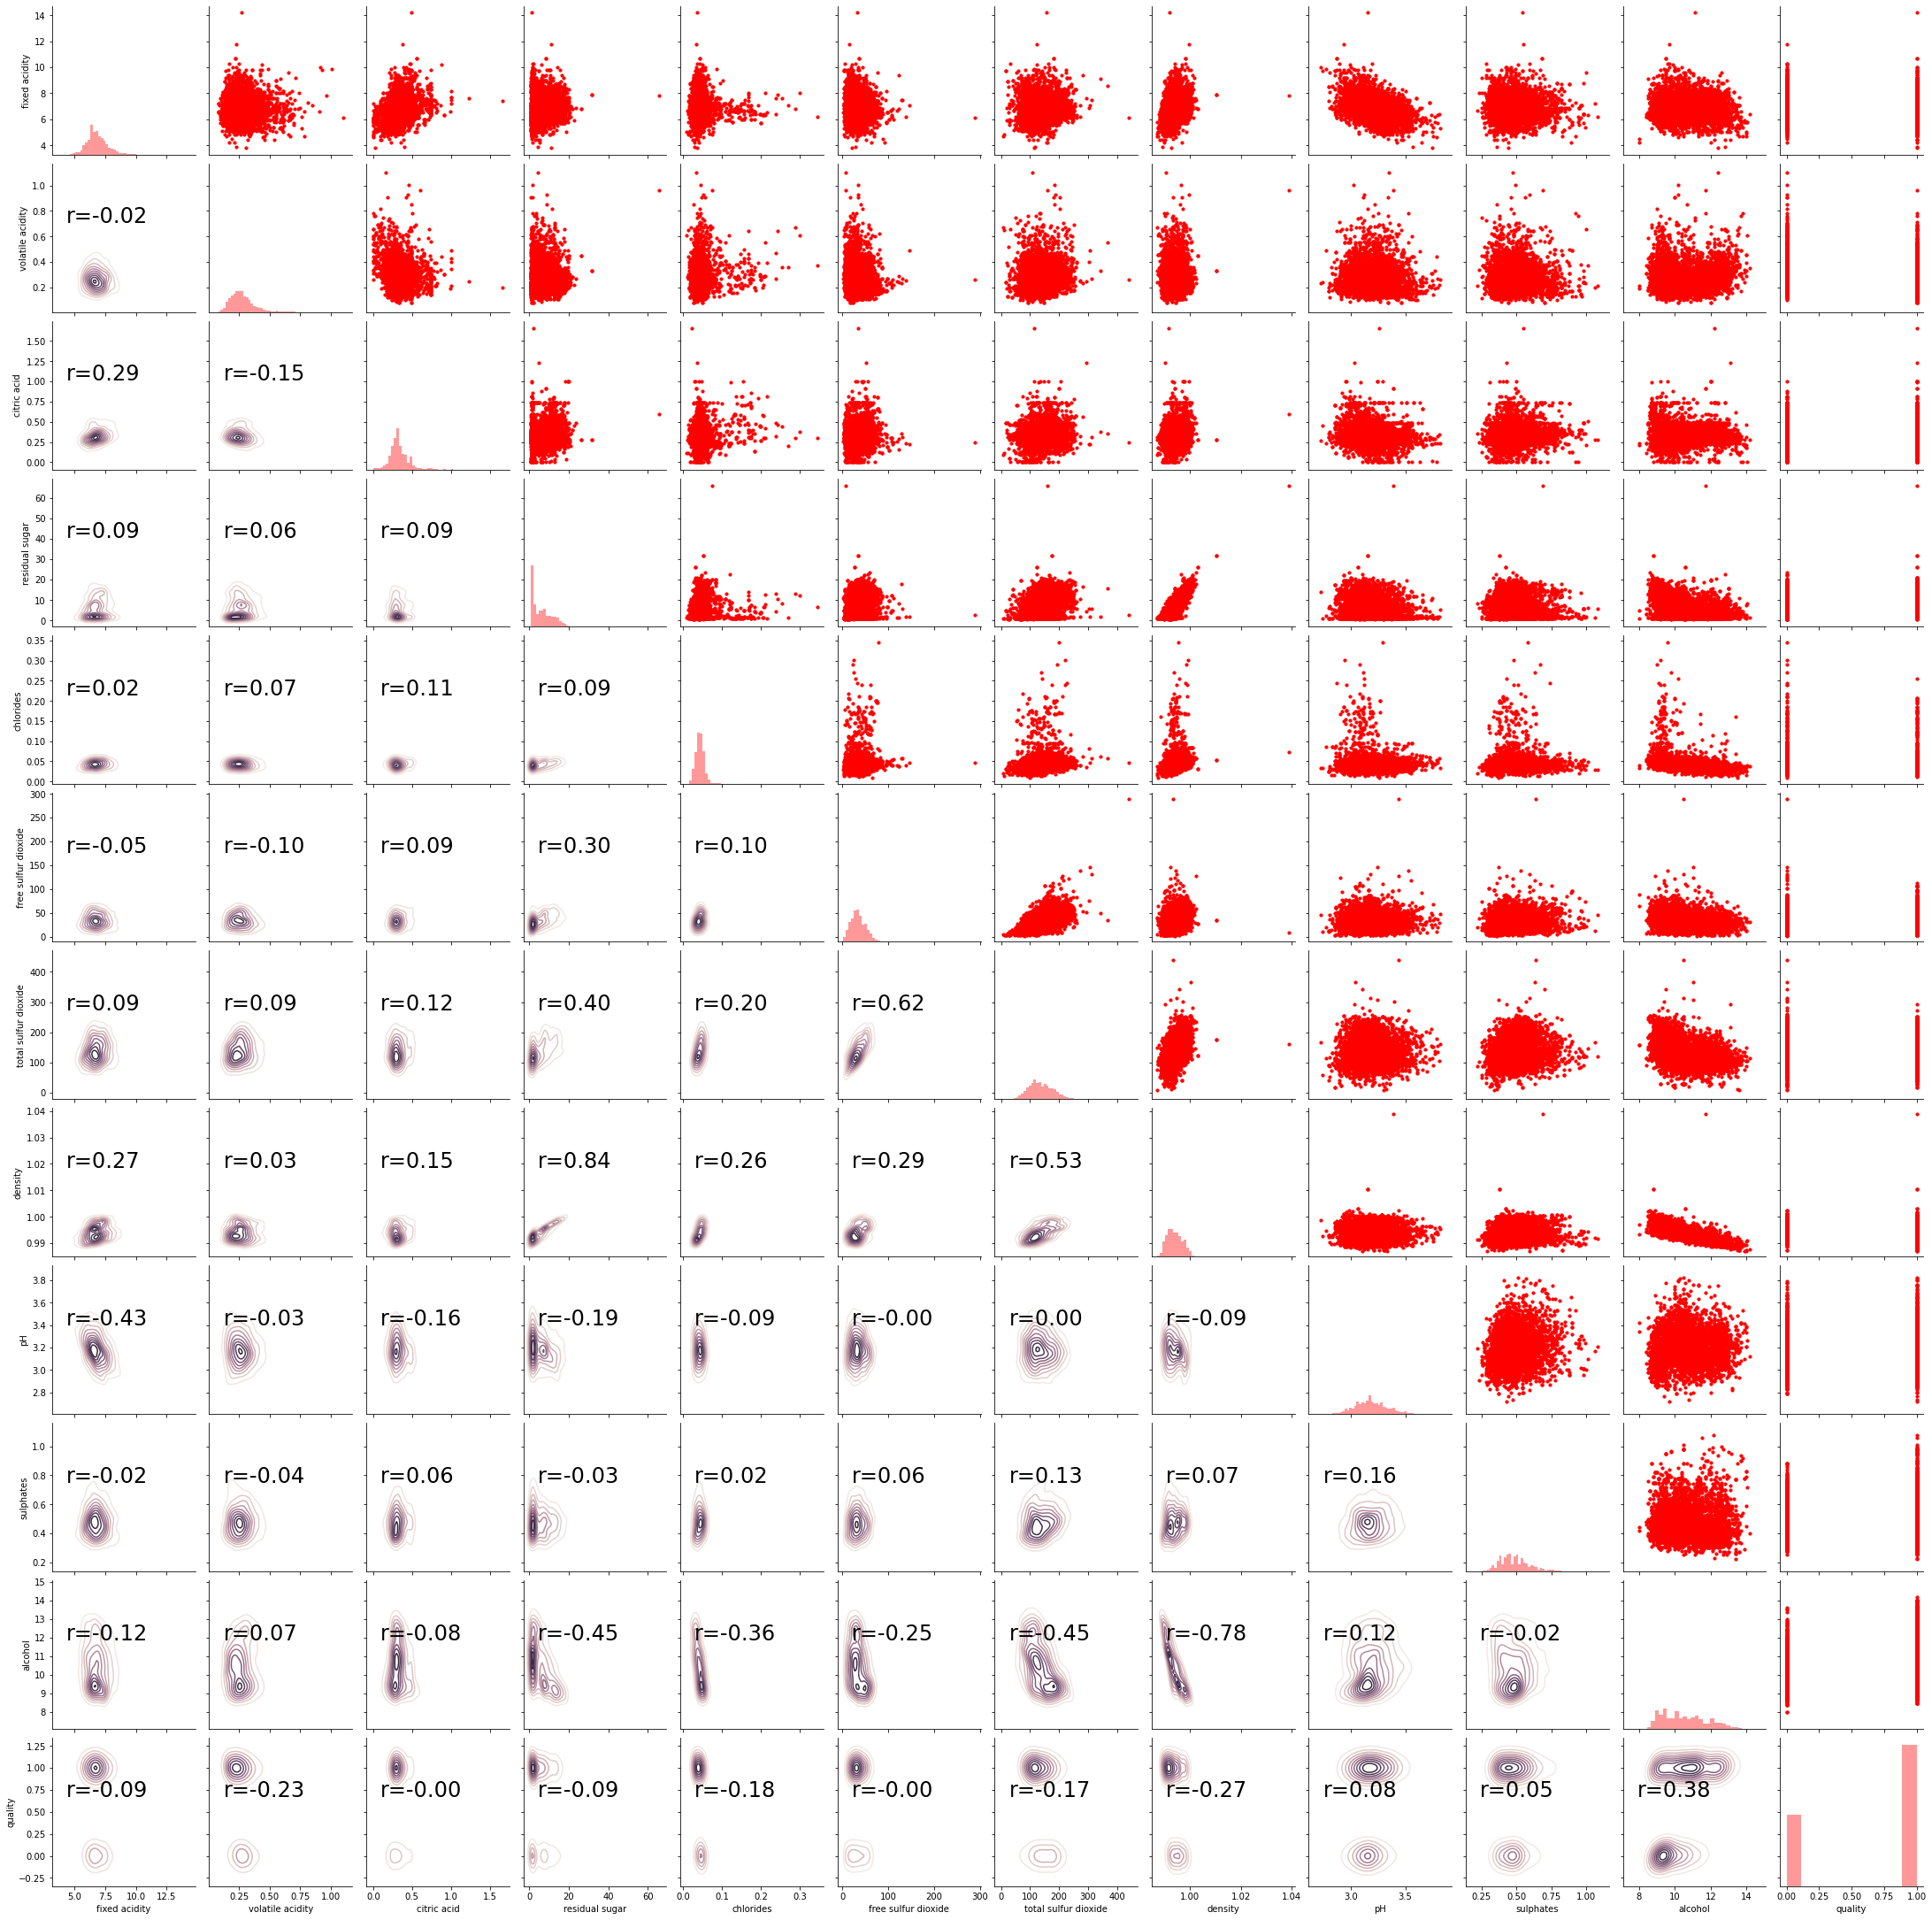

In [118]:
#14) having issue with seaborn. looks like it need to downgrade ipykernel from 4.3.1 to 4.1.1
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x,y, **kws):
   r,_= stats.pearsonr(x,y)
   ax = plt.gca()
   ax.annotate("r={:.2f}".format(r), xy =(.1,.6), xycoords = ax.transAxes, size = 24)
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)
sns.set_context(font_scale=2)
#Pair grid set up
g = sns.PairGrid(data)
#Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'red')
#Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'red')
#Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [128]:
#15) Drop the redundant features.
data.drop(columns = ['free sulfur dioxide','total sulfur dioxide','chlorides','sulphates' ] )

,fixed acidity,volatile acidity,citric acid,residual sugar,density,pH,alcohol,quality
0,7.0,0.27,0.36,20.7,1.00100,3.00,8.8,1
1,6.3,0.30,0.34,1.6,0.99400,3.30,9.5,1
2,8.1,0.28,0.40,6.9,0.99510,3.26,10.1,1
3,7.2,0.23,0.32,8.5,0.99560,3.19,9.9,1
4,7.2,0.23,0.32,8.5,0.99560,3.19,9.9,1
...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.99114,3.27,11.2,1
4894,6.6,0.32,0.36,8.0,0.99490,3.15,9.6,0
4895,6.5,0.24,0.19,1.2,0.99254,2.99,9.4,1
4896,5.5,0.29,0.30,1.1,0.98869,3.34,12.8,1


In [48]:
#16 split the data into train and test set
# X - numpy array with rows representing data samples and columns representing features
# Y - lables corresponding to each row of the feature matrix
# t - real # to determine the size of partition
def partition(X, Y, t): #take 3 arguments(numpy array with rows representing data samples and columns represeting features)
        
    test_size = math.ceil(len(Y)*t)
    training_size = len(Y)-test_size
    training_data = X[0:training_size][:]
    testing_data = X[training_size+1:len(Y)] [:]
    training_vector = Y[0:training_size]
    testing_vector = Y[training_size+1:len(Y)]
    
    return [training_data, testing_data, training_vector, testing_vector]
    
    
partition(data._get_numeric_data(), data['quality'], .20)

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0             0.270         0.36            20.7      0.045   
 1               6.3             0.300         0.34             1.6      0.049   
 2               8.1             0.280         0.40             6.9      0.050   
 3               7.2             0.230         0.32             8.5      0.058   
 4               7.2             0.230         0.32             8.5      0.058   
 ...             ...               ...          ...             ...        ...   
 3913            7.2             0.250         0.32             1.5      0.054   
 3914            6.2             0.390         0.24             4.8      0.037   
 3915            4.7             0.455         0.18             1.9      0.036   
 3916            7.1             0.370         0.30             6.2      0.040   
 3917            6.2             0.280         0.51             7.9      0.056   
 
       free su

In [136]:
# Part B.17

#running KNN_Classifier with n_neighbors = 5
#KNN_Classifier()

# partition data to run KNN classifier
knn_data = partition( data.to_numpy(), data['quality'].to_numpy(), .20)

model = KNN_Classifier()
model.fit(knn_data[0], knn_data[2], 5,'euclidean')
predictions = model.predict(knn_data[1])

# results of white whine data
print("Results of white whine data")
print("Accuracy and error: ",accuracy_generalization_error(knn_data[3], predictions))
print("F1 Score: ", (2*precision(knn_data[3],predictions)*recall(knn_data[3],predictions))/(precision(knn_data[3],predictions)+recall(knn_data[3],predictions)))
print("\n")

# stardardize white whine data
std_data = (data - data.mean())/data.std()
std_data['quality'] = data['quality']

#partion standardized white whine data
std_knn_data = partition( std_data.to_numpy(), std_data['quality'].to_numpy(), .20)

# KNN on standardized white whine data
model = KNN_Classifier()
model.fit(std_knn_data[0], std_knn_data[2], 5,'euclidean')
std_predictions = model.predict(std_knn_data[1])

# results of standardized white whine data
print("Results of standardized white whine data")
print("Accuracy and error: ",accuracy_generalization_error(std_knn_data[3], std_predictions))
print("F1 Score is ", (2*precision(std_knn_data[3],std_predictions)*recall(std_knn_data[3],std_predictions))/(precision(std_knn_data[3],std_predictions)+recall(std_knn_data[3],std_predictions)))


Results of white whine data
Accuracy and error:  (0.6108273748723186, 0.38917262512768136)
F1 Score:  0.8037634408602151


Results of standardized white whine data
Accuracy and error:  (0.6772216547497446, 0.3227783452502554)
F1 Score is  0.8195302843016069


In [177]:
# Part C.18

# sfold - number of folds
# data - rows representing data samples and columns representing features
# labels - labels corresponding to each row of training_features
# model - object with the fit and predict methods
# model_args - dictionary of arguments to pass to the classification algorithm
# error_function - returns error value between predicted and true labels

def sHelper(k, data):
    parts = math.ceil(len(data)/k)
    return np.array_split(data, k)

def error_function(x, y):
    return (np.square(x - y)).mean()
        


def sFold(sfolds, data, labels, model, model_args, error_function):
    partions = sHelp(sfolds, data)
    
    expected_labels = []
    predicted_labels = []
    average_error = []
    
    for i in range(0, sfolds):
        model = KNN_Classifier()
        current_data = []
        for j in range(0, sfolds):
            if(i == j):
                continue
            else:
                current_data.append(partions[i])
          
        model.fit(current_data,current_data[:,len(current_data)], model.n_neighbors, model.weights)
        current_partition_predictions = model.predict(partions[i][:,len(partions[i][0])-1])
        
        expected_labels.append(partions[i][:,len(partions[i][0])-1])
        predicted_labels.append(current_partition_predictions)
        average_error(partions[i][:,len(partions[i][0])-1],current_partition_predictions)
        
    return {"Expected labels" : expected_labels,
            "Predicted labels" : predicted_labels,
            "Average error" : average_error}
                                                                